**Comprehensive Employee Data Analysis**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# Load dataset
df = pd.read_csv("D:/projects/classic learn/data_analysis/hr_dashboard_data.csv")


In [4]:

# Display first few rows
df


,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216


In [5]:

# Check for missing values
df.isnull().sum()


Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

**Employee Distribution by Department**

In [7]:
# Separate the rows under the "Department" column
departments = df['Department'].unique()

In [8]:
# Function to categorize employees by department
def categorize_employees_by_department(df):
    departments = df['Department'].unique()
    dept_employee_counts = {}
    
    for dept in departments:
        dept_employees = df[df['Department'] == dept]
        dept_employee_counts[dept] = len(dept_employees)
        print(f"\nDepartment: {dept}")
        print(dept_employees[['Name', 'Position', 'Salary']])
    
    return dept_employee_counts

# Categorize employees by department
dept_employee_counts = categorize_employees_by_department(df)

# Display department-wise employee count
print("\nDepartment-wise Employee Count:")
for dept, count in dept_employee_counts.items():
    print(f"{dept}: {count}")

# Display total number of employees
total_employees = sum(dept_employee_counts.values())
print(f"\nTotal number of employees: {total_employees}")


Department: Marketing
                    Name          Position  Salary
0        Douglas Lindsey           Analyst   63596
3           Joshua Lewis            Intern   38303
8            Daryl Noble  Junior Developer   49323
13      Ms. Emily Dawson           Analyst   70271
16            Erin Smith         Team Lead  105893
17       James Hernandez         Team Lead   92074
23      Stephanie Rivera  Junior Developer   56946
30        Michelle Perez  Junior Developer   57478
31            Kim Larson  Junior Developer   47322
33       Steven Anderson            Intern   30509
35           Robin Hurst           Analyst   71558
47            James Berg           Analyst   70095
70        Jordan Morales  Senior Developer   92954
71          Gregory Wong         Team Lead   92217
73            Amy Garcia           Analyst   69347
79          Paula Gamble  Senior Developer   82101
83         Calvin Mullen           Manager  107320
89           Molly Jones  Senior Developer   83554
101     

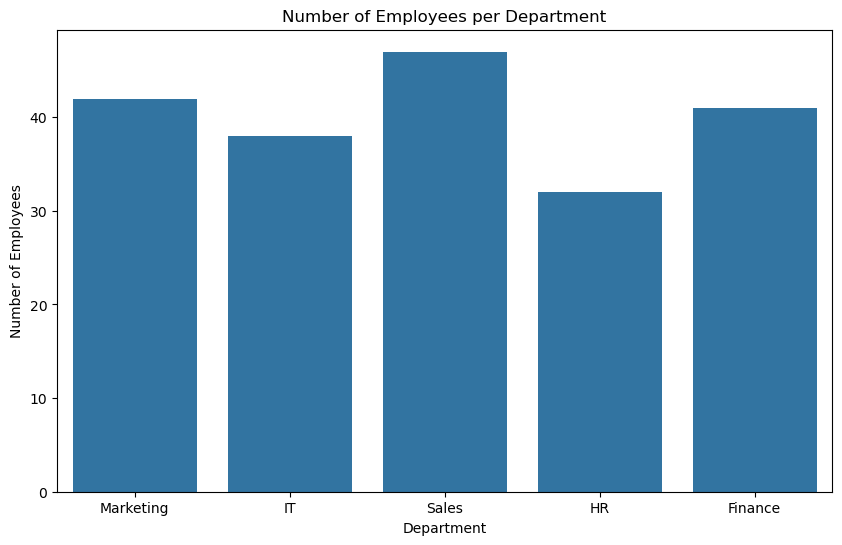

In [9]:
# Generate a bar plot for department-wise employee count
plt.figure(figsize=(10, 6))
sns.barplot(x=list(dept_employee_counts.keys()), y=list(dept_employee_counts.values()))
plt.title("Number of Employees per Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()

In [35]:
# Calculate average salary per department
avg_salary_per_dept = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)

# Identify the department with the highest average salary
highest_paid_dept = avg_salary_per_dept.idxmax()
highest_avg_salary = avg_salary_per_dept.max()

# Find the highest-paid employee in that department
top_earner = df[df['Department'] == highest_paid_dept].sort_values(by='Salary', ascending=False).iloc[0]

print(f"Department with Highest Average Salary: {highest_paid_dept} (${highest_avg_salary:.2f})")
print(f"Top Earner in {highest_paid_dept}: {top_earner['Name']} - ${top_earner['Salary']}")

# Find the highest-paid employee in each department
top_earners_per_dept = df.loc[df.groupby('Department')['Salary'].idxmax(), 
                              ['Department', 'Name', 'Position', 'Salary', 'Projects Completed', 'Productivity (%)']]

# Display the top earners in each department

print("\nTop Earners in Each Department:")
print(top_earners_per_dept.sort_values(by='Salary', ascending=False))

Department with Highest Average Salary: Finance ($80295.20)
Top Earner in Finance: Susan Johnson - $119895

Top Earners in Each Department:
    Department             Name Position  Salary  Projects Completed  \
27     Finance    Susan Johnson  Manager  119895                  17   
166  Marketing   Anthony Barton  Manager  119567                  20   
78          IT      Daniel Mata  Manager  119208                  25   
15       Sales   Melissa Galvan  Manager  118466                  17   
133         HR  Patrick Manning  Manager  116473                  16   

     Productivity (%)  
27                 26  
166                54  
78                 47  
15                  3  
133                98  


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3500\3392798291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_per_dept.index, y=avg_salary_per_dept.values, palette="viridis")


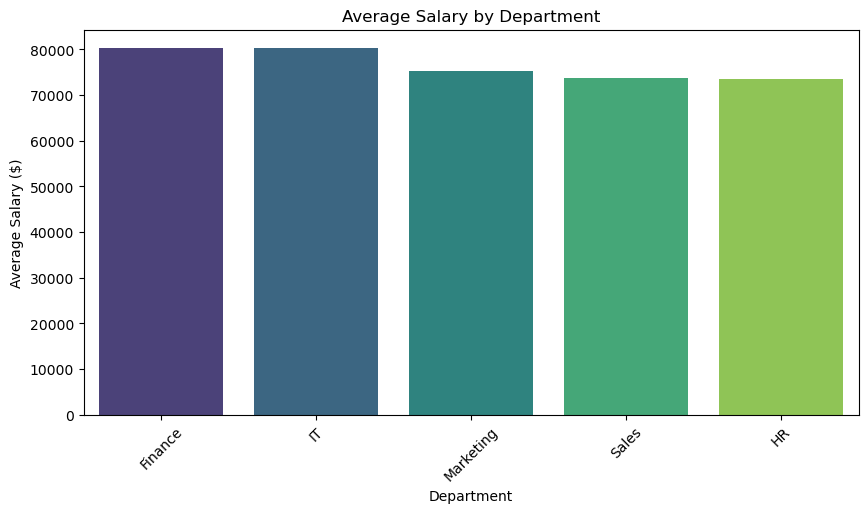

In [33]:
# ----------- Visualization 1: Bar Plot of Average Salary Per Department ------------
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_salary_per_dept.index, y=avg_salary_per_dept.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Average Salary ($)")
plt.title("Average Salary by Department")
plt.show()

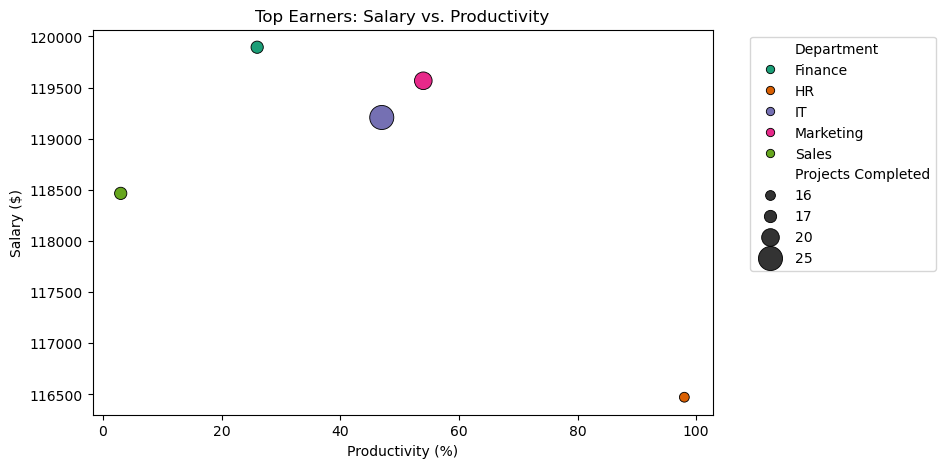

In [26]:
# ----------- Visualization 2: Scatter Plot of Salary vs. Productivity for Top Earners ------------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=top_earners_per_dept, 
                x="Productivity (%)", y="Salary", 
                hue="Department", size="Projects Completed",
                sizes=(50, 300), palette="Dark2", 
                edgecolor="black")
plt.xlabel("Productivity (%)")
plt.ylabel("Salary ($)")
plt.title("Top Earners: Salary vs. Productivity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

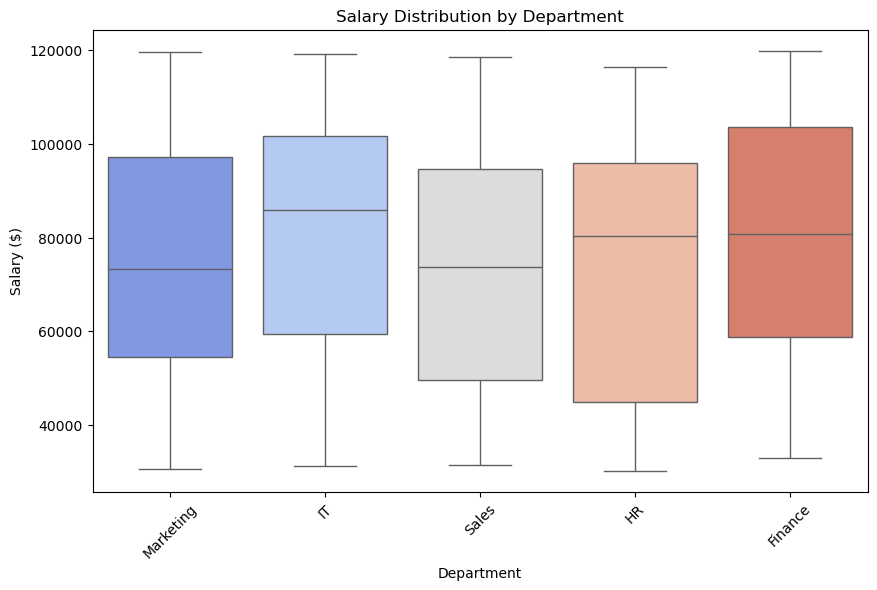

In [31]:

# ----------- Visualization 3: Box Plot of Salary Distribution by Department ------------
plt.figure(figsize=(10, 6))
sns.boxplot(x="Department", y="Salary",hue="Department", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Salary ($)")
plt.title("Salary Distribution by Department")
plt.show()


In [30]:
# Extract data for the department of the highest-paid employee
dept_data = df[df['Department'] == highest_paid_dept]

# Compare Productivity & Projects Completed
comparison = dept_data[['Name', 'Projects Completed', 'Productivity (%)', 'Salary']].sort_values(by='Salary', ascending=False)

print(comparison.head(5))  # Display top 5 earners in the department


                   Name  Projects Completed  Productivity (%)  Salary
27        Susan Johnson                  17                26  119895
55        Harold Nguyen                  22                37  116888
178       Andrew Dalton                  17                35  116039
96             Amy Carr                  24                75  114384
121  Johnathan Williams                  21                23  109581


In [44]:

# Display total number of employees
total_employees = sum(dept_employee_counts.values())
print(f"\nTotal number of employees: {total_employees}")

# Display salary statistics per department
print("\nSalary Statistics per Department:")
for dept, stats in dept_salary_stats.items():
    print(f"\nDepartment: {dept}")
    print(f"Average Salary: {stats['average_salary']}")
    print(f"Least Salary: {stats['min_salary']}")
    print(f"Employee with Least Salary:\n{stats['min_salary_employee']}")
    print(f"Highest Salary: {stats['max_salary']}")
    print(f"Employee with Highest Salary:\n{stats['max_salary_employee']}")

# Calculate total salary expenditure per month
total_monthly_salary = df['Salary'].sum()
total_annual_salary = total_monthly_salary * 12
print(f"\nTotal annual salary expenditure: {total_annual_salary}")
print(f"Total monthly salary expenditure: {total_monthly_salary}")



Total number of employees: 200

Salary Statistics per Department:

Department: Marketing
Average Salary: 75361.95238095238
Least Salary: 30509
Employee with Least Salary:
               Name Position  Salary
33  Steven Anderson   Intern   30509
Highest Salary: 119567
Employee with Highest Salary:
               Name Position  Salary
166  Anthony Barton  Manager  119567

Department: IT
Average Salary: 80274.8947368421
Least Salary: 31328
Employee with Least Salary:
              Name Position  Salary
194  Michael Baker   Intern   31328
Highest Salary: 119208
Employee with Highest Salary:
           Name Position  Salary
78  Daniel Mata  Manager  119208

Department: Sales
Average Salary: 73757.36170212766
Least Salary: 31456
Employee with Least Salary:
             Name Position  Salary
131  John Elliott   Intern   31456
Highest Salary: 118466
Employee with Highest Salary:
              Name Position  Salary
15  Melissa Galvan  Manager  118466

Department: HR
Average Salary: 73421.9375


**# Salary expenditure per department** 
total expenditure monthly and Annualy

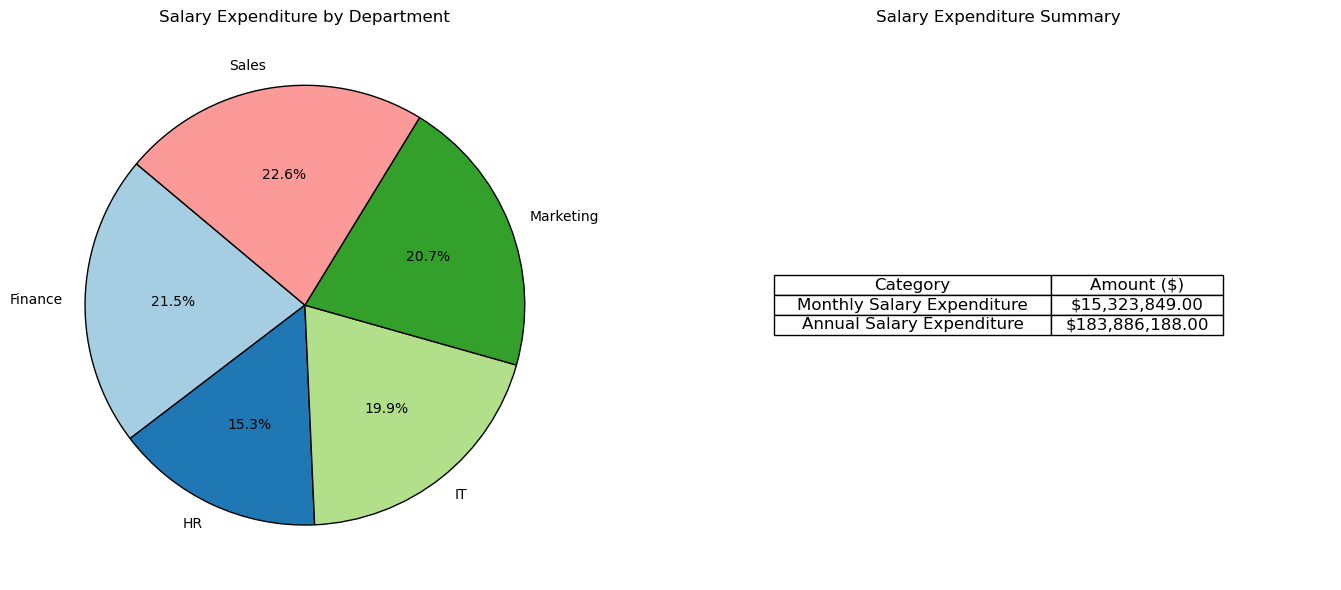

In [ ]:
# Salary expenditure per department
# --------- Data Preparation ---------

salary_expenditure_per_dept = df.groupby('Department')['Salary'].sum()

# Total salary calculations
total_monthly_salary = df['Salary'].sum()
total_annual_salary = total_annual_salary*12

# --------- Visualization: Combined Pie Chart & Table ---------
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Creating two subplots

# -------- Pie Chart: Salary Expenditure by Department --------
ax[0].pie(salary_expenditure_per_dept, labels=salary_expenditure_per_dept.index, autopct='%1.1f%%', 
          colors=plt.cm.Paired.colors, startangle=140, wedgeprops={'edgecolor': 'black'})
ax[0].set_title("Salary Expenditure by Department")

# -------- Table Chart: Monthly & Annual Salary Expenditure --------
# Define table data
table_data = [
    ["Monthly Salary Expenditure", f"${total_monthly_salary:,.2f}"],
    ["Annual Salary Expenditure", f"${total_annual_salary:,.2f}"]
]

# Hide axis and create a table
ax[1].axis("off")
table = ax[1].table(cellText=table_data, colLabels=["Category", "Amount ($)"], loc="center", cellLoc="center")

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width([0, 1])

ax[1].set_title("Salary Expenditure Summary")

# Show the combined visualization
plt.tight_layout()
plt.show()

**#Productivity and Satisfaction Trends Across Departments**

In [46]:
# Average productivity and satisfaction rate per department
dept_productivity = df.groupby('Department')[['Productivity (%)', 'Satisfaction Rate (%)']].mean()

print(dept_productivity)


            Productivity (%)  Satisfaction Rate (%)
Department                                         
Finance            42.268293              50.048780
HR                 48.125000              51.625000
IT                 56.342105              54.342105
Marketing          44.261905              46.023810
Sales              44.212766              48.617021


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3500\2858089894.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(dept_productivity["Department"], rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3500\2858089894.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(dept_productivity["Department"], rotation=45)


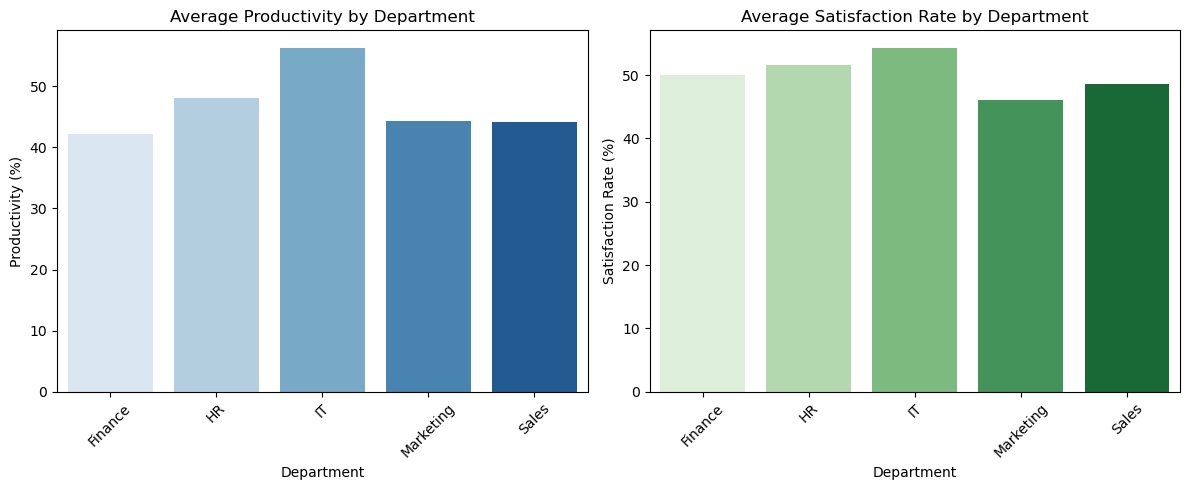

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Ensure index is a list for proper plotting
dept_productivity = dept_productivity.reset_index()


# Barplot: Average Productivity by Department
sns.barplot(x="Department", y="Productivity (%)", data=dept_productivity, ax=ax[0], palette="Blues", hue="Department", dodge=False)
ax[0].set_title("Average Productivity by Department")
ax[0].set_xlabel("Department")
ax[0].set_ylabel("Productivity (%)")
ax[0].set_xticklabels(dept_productivity["Department"], rotation=45)

# Barplot: Average Satisfaction Rate by Department
sns.barplot(x="Department", y="Satisfaction Rate (%)", data=dept_productivity, ax=ax[1], palette="Greens", hue="Department", dodge=False)
ax[1].set_title("Average Satisfaction Rate by Department")
ax[1].set_xlabel("Department")
ax[1].set_ylabel("Satisfaction Rate (%)")
ax[1].set_xticklabels(dept_productivity["Department"], rotation=45)

plt.tight_layout()
plt.show()

**Joining Date & Salary Progression Analysis**

Joining Year
1998.0    107320.00
1999.0    111051.75
Name: Salary, dtype: float64


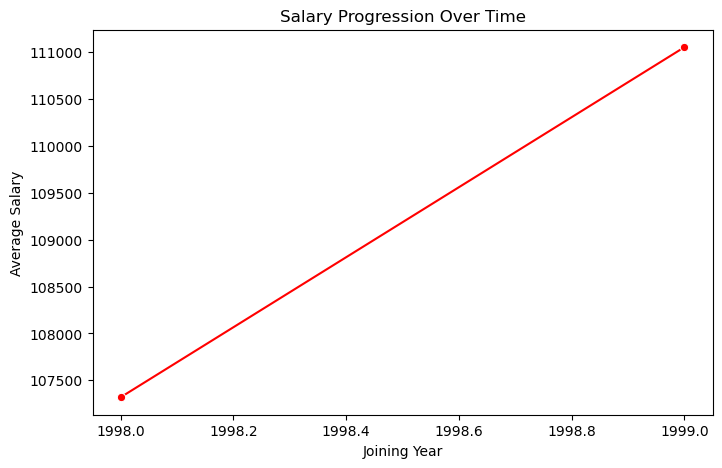

In [58]:

# Convert 'Joining Date' column to datetime format, handling errors
df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce')

# Find salary trends by year of joining

df['Joining Year'] = df['Joining Date'].dt.year
salary_trend = df.groupby('Joining Year')['Salary'].mean()

print(salary_trend)

plt.figure(figsize=(8, 5))
sns.lineplot(x=salary_trend.index, y=salary_trend.values, marker="o", color="red")
plt.xlabel("Joining Year")
plt.ylabel("Average Salary")
plt.title("Salary Progression Over Time")
plt.show()


**Satisfaction Rate vs. Feedback Scores Across Departments**

                       Satisfaction Rate (%)  Feedback Score
Satisfaction Rate (%)               1.000000        0.008068
Feedback Score                      0.008068        1.000000


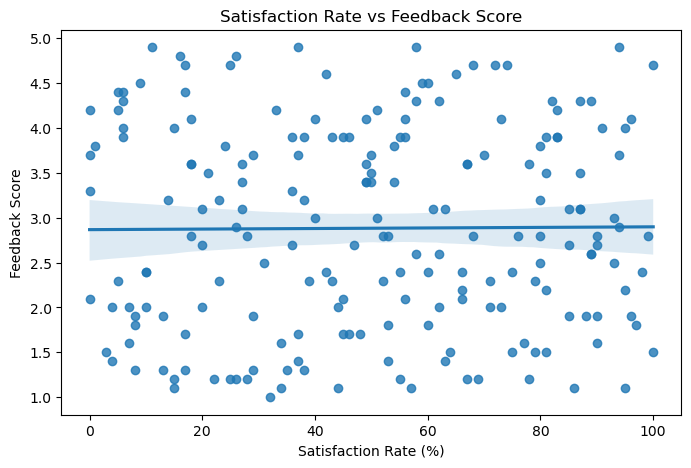

In [59]:
# Correlation analysis
satisfaction_feedback_corr = df[['Satisfaction Rate (%)', 'Feedback Score']].corr()

print(satisfaction_feedback_corr)

plt.figure(figsize=(8, 5))
sns.regplot(x=df['Satisfaction Rate (%)'], y=df['Feedback Score'])
plt.title("Satisfaction Rate vs Feedback Score")
plt.show()
